In [1]:
import ROOT

Module libc not found.


Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMultiVarGaussian2e_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

from os.path import exists

import read_config_utils as cu

In [4]:
import sys
import time

In [5]:
input_dir = 'output-files-bootstrap-test6b-4d-1b'
points_file = 'train-and-true-samples.npy'





In [6]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [7]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 4




In [8]:
with open( '%s/config-pars.npy' % input_dir, 'rb') as f :
    train_mu = np.load(f, allow_pickle=True )
    train_rho = np.load(f, allow_pickle=True)
    train_sig = np.load(f, allow_pickle=True)    
    true_mu = np.load(f, allow_pickle=True )
    true_rho = np.load(f, allow_pickle=True)
    true_sig = np.load(f, allow_pickle=True)  
    resolution = np.load(f, allow_pickle=True)

In [9]:
with open('%s/%s' % (input_dir, points_file),'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [10]:
n_samples = 0

for fi in range(1000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 50 bootstrap samples.




## Read in the main OmniFold ouput for the fake data and fit it before doing the bootstraps

In [11]:
with open('%s/omnifold-output-weights.npy' % (input_dir),'rb') as f :
    sample_weights = np.load(f)

In [12]:

nmcevts = len(train_pts)

print( "train_pts shape:  %s" % str(train_pts.shape))
print( "weights:  %s" % str(sample_weights.shape))

print( "number of MC events: %d" % nmcevts)

train_pts shape:  (4000000, 4)
weights:  (4000000,)
number of MC events: 4000000


In [13]:


true_cov  = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if i == j :
            true_cov[i][j] = true_sig[i] * true_sig[j]
            print("  %2d, %2d : diagonal  %8.4f" % (i,j, true_cov[i][j]))
        else :
            k = ndim - j - 1
            true_cov[i][j] = true_sig[i] * true_sig[j] * true_rho[i][k]
            true_cov[j][i] = true_cov[i][j]
            print("  %2d, %2d : diagonal  %8.3f * %8.3f * %8.3f = %8.4f" % 
                  (i,j, true_sig[i], true_sig[j], true_rho[i][k], true_cov[i][j]))
            
            
   

   0,  0 : diagonal    0.6400
   0,  1 : diagonal     0.800 *    0.600 *    0.000 =   0.0000
   0,  2 : diagonal     0.800 *    1.000 *   -0.300 =  -0.2400
   0,  3 : diagonal     0.800 *    0.600 *    0.400 =   0.1920
   1,  1 : diagonal    0.3600
   1,  2 : diagonal     0.600 *    1.000 *    0.200 =   0.1200
   1,  3 : diagonal     0.600 *    0.600 *    0.000 =   0.0000
   2,  2 : diagonal    1.0000
   2,  3 : diagonal     1.000 *    0.600 *    0.500 =   0.3000
   3,  3 : diagonal    0.3600


## Read in the simple calculation results to set the parameter limits

In [14]:
with open( '%s/simple-calc-results.npy' % input_dir, 'rb') as f :
    sc_ave_mean_val = np.load(f, allow_pickle=True )
    sc_ave_mean_rms = np.load(f, allow_pickle=True)
    sc_ave_cov_val  = np.load(f, allow_pickle=True)    
    sc_ave_cov_rms  = np.load(f, allow_pickle=True )



In [15]:
sc_ave_cov_val

array([[ 6.60612466e-01, -6.69544910e-03, -2.29807411e-01,
         1.83483091e-01],
       [ 0.00000000e+00,  3.89930560e-01,  1.15064796e-01,
         6.82058309e-04],
       [ 0.00000000e+00,  0.00000000e+00,  9.52715317e-01,
         2.99434247e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.64452371e-01]])

In [16]:
print('\n\n')
print('  Simple direct calculation results from the bootstrap samples.\n')

for fi in range(ndim) :
    print('  feature %d  mean:   %8.4f  (true %8.4f) RMS  %8.4f'
         % (fi, sc_ave_mean_val[fi], true_mu[fi], sc_ave_mean_rms[fi]) )
    
print('\n')

for i in range(ndim) :
    for j in range(i,ndim) :
        print('   %d, %d  cov:   %8.4f  (true %8.4f) RMS  %8.4f'
              % ( i, j, sc_ave_cov_val[i][j], true_cov[i,j], sc_ave_cov_rms[i][j]) )

print('\n\n')




  Simple direct calculation results from the bootstrap samples.

  feature 0  mean:     0.8046  (true   0.8000) RMS    0.0021
  feature 1  mean:     0.0963  (true   0.1000) RMS    0.0013
  feature 2  mean:    -0.5849  (true  -0.6000) RMS    0.0034
  feature 3  mean:     0.6961  (true   0.7000) RMS    0.0018


   0, 0  cov:     0.6606  (true   0.6400) RMS    0.0038
   0, 1  cov:    -0.0067  (true   0.0000) RMS    0.0030
   0, 2  cov:    -0.2298  (true  -0.2400) RMS    0.0029
   0, 3  cov:     0.1835  (true   0.1920) RMS    0.0025
   1, 1  cov:     0.3899  (true   0.3600) RMS    0.0035
   1, 2  cov:     0.1151  (true   0.1200) RMS    0.0039
   1, 3  cov:     0.0007  (true   0.0000) RMS    0.0022
   2, 2  cov:     0.9527  (true   1.0000) RMS    0.0047
   2, 3  cov:     0.2994  (true   0.3000) RMS    0.0022
   3, 3  cov:     0.3645  (true   0.3600) RMS    0.0030





In [17]:
width_factor_mean = 10
width_factor_cov = 10

###  Do it this way to keep all the RooRealVars in memory in separate objects (different elements in the dictionary).

In [18]:
covdict = {}


for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        vname = "cov%d%d" % (i,j)
        startval = sc_ave_cov_val[i][j]
        minval = sc_ave_cov_val[i][j] - width_factor_cov * sc_ave_cov_rms[i][j]
        maxval = sc_ave_cov_val[i][j] + width_factor_cov * sc_ave_cov_rms[i][j]   
        print(' parameter %s  min %8.4f, max %8.4f' % (vname, minval, maxval))
        if ( i == j ) :
            ######covdict[vname] =  ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), true_cov[i][j], 0.02, 2.0 )           
            covdict[vname] =  ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), startval, minval, maxval )
        else :
            ######covdict[vname] =   ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), true_cov[i][j], -1.1, 1.1 ) 
            covdict[vname] =  ROOT.RooRealVar( "cov%d%d" % (i,j), "cov%d%d" % (i,j), startval, minval, maxval )
        covdict[vname].Print()
        


 parameter cov00  min   0.6223, max   0.6989
 parameter cov01  min  -0.0368, max   0.0235
 parameter cov02  min  -0.2592, max  -0.2004
 parameter cov03  min   0.1588, max   0.2082
 parameter cov11  min   0.3546, max   0.4253
 parameter cov12  min   0.0756, max   0.1545
 parameter cov13  min  -0.0212, max   0.0225
 parameter cov22  min   0.9060, max   0.9994
 parameter cov23  min   0.2774, max   0.3215
 parameter cov33  min   0.3343, max   0.3946
RooRealVar::cov00 = 0.660612  L(0.622339 - 0.698886) 
RooRealVar::cov01 = -0.00669545  L(-0.0368463 - 0.0234554) 
RooRealVar::cov02 = -0.229807  L(-0.259217 - -0.200398) 
RooRealVar::cov03 = 0.183483  L(0.158762 - 0.208204) 
RooRealVar::cov11 = 0.389931  L(0.354567 - 0.425294) 
RooRealVar::cov12 = 0.115065  L(0.0756311 - 0.154498) 
RooRealVar::cov13 = 0.000682058  L(-0.0211807 - 0.0225448) 
RooRealVar::cov22 = 0.952715  L(0.906007 - 0.999424) 
RooRealVar::cov23 = 0.299434  L(0.277394 - 0.321474) 
RooRealVar::cov33 = 0.364452  L(0.3343 - 0.39460

In [19]:
covRAL = ROOT.RooArgList()


for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        vname = "cov%d%d" % (i,j)
        covRAL.add( covdict[vname] )


In [20]:
ralind = 0
for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        print( "  %d, %d :  %2d :  %s  %8.3f" % (i,j, ralind, covRAL.at(ralind).GetName(), covRAL.at(ralind).getVal() )) 
        ralind = ralind + 1

  0, 0 :   0 :  cov00     0.661
  0, 1 :   1 :  cov01    -0.007
  0, 2 :   2 :  cov02    -0.230
  0, 3 :   3 :  cov03     0.183
  1, 1 :   4 :  cov11     0.390
  1, 2 :   5 :  cov12     0.115
  1, 3 :   6 :  cov13     0.001
  2, 2 :   7 :  cov22     0.953
  2, 3 :   8 :  cov23     0.299
  3, 3 :   9 :  cov33     0.364


### The Dict keeps the variables defined in memory

In [21]:
xDict = {}
muDict = {}

xVec = ROOT.RooArgList()
muVec = ROOT.RooArgList()


for i in range(ndim) :
    vname = "x%d" % i
    xDict[vname] = ROOT.RooRealVar( vname, vname, 0., -10., 10. )
    xVec.add( xDict[vname] )
    vname = "mu_x%d" % i
    startval = sc_ave_mean_val[i]
    minval = sc_ave_mean_val[i] - width_factor_mean * sc_ave_mean_rms[i]
    maxval = sc_ave_mean_val[i] + width_factor_mean * sc_ave_mean_rms[i]
    print('  feature %d  mean :  min %8.4f, max %8.4f' % (i, minval, maxval))
    ##########muDict[vname] =  ROOT.RooRealVar( vname, vname, true_mu[i], -2., 2. )
    muDict[vname] =  ROOT.RooRealVar( vname, vname, startval, minval, maxval )
    muDict[vname].Print()
    muVec.add( muDict[vname] )
    
    
weight = ROOT.RooRealVar("weight","weight", 0., 100. )

  feature 0  mean :  min   0.7834, max   0.8258
  feature 1  mean :  min   0.0838, max   0.1089
  feature 2  mean :  min  -0.6186, max  -0.5511
  feature 3  mean :  min   0.6784, max   0.7137
RooRealVar::mu_x0 = 0.804595  L(0.783394 - 0.825795) 
RooRealVar::mu_x1 = 0.0963352  L(0.0837985 - 0.108872) 
RooRealVar::mu_x2 = -0.584853  L(-0.618616 - -0.551091) 
RooRealVar::mu_x3 = 0.696063  L(0.678381 - 0.713745) 


In [22]:
rmvg = ROOT.RooMultiVarGaussian2e("rmvg","rmvg", xVec, muVec, covRAL )

  Setting _prevCovVals[0] to 0.660612
  Setting _prevCovVals[1] to -0.006695
  Setting _prevCovVals[2] to -0.229807
  Setting _prevCovVals[3] to 0.183483
  Setting _prevCovVals[4] to 0.389931
  Setting _prevCovVals[5] to 0.115065
  Setting _prevCovVals[6] to 0.000682
  Setting _prevCovVals[7] to 0.952715
  Setting _prevCovVals[8] to 0.299434
  Setting _prevCovVals[9] to 0.364452
 i,j = 0,0
 i,j = 0,1
 i,j = 0,2
 i,j = 0,3
 i,j = 1,1
 i,j = 1,2
 i,j = 1,3
 i,j = 2,2
 i,j = 2,3
 i,j = 3,3

4x4 matrix is as follows

     |      0    |      1    |      2    |      3    |
---------------------------------------------------------
   0 |     0.6606   -0.006695     -0.2298      0.1835 
   1 |  -0.006695      0.3899      0.1151   0.0006821 
   2 |    -0.2298      0.1151      0.9527      0.2994 
   3 |     0.1835   0.0006821      0.2994      0.3645 


4x4 matrix is as follows

     |      0    |      1    |      2    |      3    |
---------------------------------------------------------
   0 | 

In [23]:
xVec.Print("V")

  1) RooRealVar:: x0 = 0
  2) RooRealVar:: x1 = 0
  3) RooRealVar:: x2 = 0
  4) RooRealVar:: x3 = 0


In [24]:
data_test = ROOT.RooDataSet( "data_test", "data_test", ROOT.RooArgSet(xVec, weight) , ROOT.RooFit.WeightVar("weight"))

In [25]:
%%time

for i in range( len(sample_weights) ) :
    if i % (len(sample_weights)/100 ) == 0 : print( " %9d / %9d  (%6.0f)%%" % (i, len(sample_weights), 100*i/len(sample_weights)))
    for j in range( ndim ) :
        xVec[j].setVal( train_pts[i,j] )
    weight.setVal( sample_weights[i])
    data_test.add( ROOT.RooArgSet(xVec, weight), weight.getVal() )

         0 /   4000000  (     0)%
     40000 /   4000000  (     1)%
     80000 /   4000000  (     2)%
    120000 /   4000000  (     3)%
    160000 /   4000000  (     4)%
    200000 /   4000000  (     5)%
    240000 /   4000000  (     6)%
    280000 /   4000000  (     7)%
    320000 /   4000000  (     8)%
    360000 /   4000000  (     9)%
    400000 /   4000000  (    10)%
    440000 /   4000000  (    11)%
    480000 /   4000000  (    12)%
    520000 /   4000000  (    13)%
    560000 /   4000000  (    14)%
    600000 /   4000000  (    15)%
    640000 /   4000000  (    16)%
    680000 /   4000000  (    17)%
    720000 /   4000000  (    18)%
    760000 /   4000000  (    19)%
    800000 /   4000000  (    20)%
    840000 /   4000000  (    21)%
    880000 /   4000000  (    22)%
    920000 /   4000000  (    23)%
    960000 /   4000000  (    24)%
   1000000 /   4000000  (    25)%
   1040000 /   4000000  (    26)%
   1080000 /   4000000  (    27)%
   1120000 /   4000000  (    28)%
   1160000 /  

In [26]:
data_test

In [27]:
data_test.Print("V")

DataStore data_test (data_test)
  Contains 4000000 entries
  Observables: 
    1)  x0 = 0.399142  L(-10 - 10)  "x0"
    2)  x1 = 0.565302  L(-10 - 10)  "x1"
    3)  x2 = 1.89405  L(-10 - 10)  "x2"
    4)  x3 = 1.11147  L(-10 - 10)  "x3"
  Dataset variable "weight" is interpreted as the event weight


In [28]:
data_test.get(0).Print("V")

  1) RooRealVar:: x0 = -0.428674
  2) RooRealVar:: x1 = 0.243172
  3) RooRealVar:: x2 = -0.365009
  4) RooRealVar:: x3 = -0.688129


In [29]:

for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        if ( i == j ) : continue
        vname = "cov%d%d" % (i,j)
        #########covRAL.find(vname).setConstant()

In [30]:
covRAL.Print("V")

  1) RooRealVar:: cov00 = 0.660612
  2) RooRealVar:: cov01 = -0.00669545
  3) RooRealVar:: cov02 = -0.229807
  4) RooRealVar:: cov03 = 0.183483
  5) RooRealVar:: cov11 = 0.389931
  6) RooRealVar:: cov12 = 0.115065
  7) RooRealVar:: cov13 = 0.000682058
  8) RooRealVar:: cov22 = 0.952715
  9) RooRealVar:: cov23 = 0.299434
 10) RooRealVar:: cov33 = 0.364452


In [31]:
covRAL.find("cov00").isConstant()

False

In [32]:
covRAL.find("cov01").isConstant()

False

In [33]:
%%time

rfr = rmvg.fitTo( data_test, ROOT.RooFit.SumW2Error(False), ROOT.RooFit.Save(True), ROOT.RooFit.NumCPU(28))



CPU times: user 322 ms, sys: 975 ms, total: 1.3 s
Wall time: 36.1 s
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
  copy constructor, Setting _prevCovVals[0] to 0.660612
  copy constructor, Setting _prevCovVals[1] to -0.006695
  copy constructor, Setting _prevCovVals[2] to -0.229807
  copy constructor, Setting _prevCovVals[3] to 0.183483
  copy constructor, Setting _prevCovVals[4] to 0.389931
  copy constructor, Setting _prevCovVals[5] to 0.115065
  copy constructor, Setting _prevCovVals[6] to 0.000682
  copy constructor, Setting _prevCovVals[7] to 0.952715
  copy constructor, Setting _prevCovVals[8] to 0.299434
  copy constructor, Setting _prevCovVals[9] to 0.364452
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 28 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cov00       

In [34]:
covRAL.Print("V")

  1) RooRealVar:: cov00 = 0.656696 +/- 0.00146975
  2) RooRealVar:: cov01 = -0.00392325 +/- 0.000796177
  3) RooRealVar:: cov02 = -0.229486 +/- 0.00130402
  4) RooRealVar:: cov03 = 0.184891 +/- 0.000827168
  5) RooRealVar:: cov11 = 0.385112 +/- 0.000862246
  6) RooRealVar:: cov12 = 0.113815 +/- 0.000977204
  7) RooRealVar:: cov13 = 0.00054753 +/- 0.000592155
  8) RooRealVar:: cov22 = 0.955513 +/- 0.00213795
  9) RooRealVar:: cov23 = 0.301646 +/- 0.00104812
 10) RooRealVar:: cov33 = 0.363336 +/- 0.000813474


In [35]:
for i in range(ndim) :
    fit_mean = muDict["mu_x%d" % i].getVal()
    fit_mean_err = muDict["mu_x%d" % i].getError()
    print("  %2d :  mu = %8.4f   (true %8.4f) err %8.4f  diff %8.4f   diff/err  %5.2f" % 
          (i, fit_mean, true_mu[i], fit_mean_err, (fit_mean-true_mu[i]), (fit_mean-true_mu[i])/fit_mean_err) )

print("\n")

for i in range(ndim) :
    for j in range(ndim) :
        if ( j < i ) : continue
        fit_cov = covdict["cov%d%d" % (i,j)].getVal()
        fit_cov_err = covdict["cov%d%d" % (i,j)].getError()
        print(" %2d, %2d :  cov  %8.4f  (true %8.4f) err %8.4f  diff %8.4f   diff/err  %5.2f" % 
              (i,j, fit_cov, true_cov[i][j], fit_cov_err, 
               (fit_cov-true_cov[i][j]), (fit_cov-true_cov[i][j])/fit_cov_err)  )

   0 :  mu =   0.8033   (true   0.8000) err   0.0013  diff   0.0033   diff/err   2.58
   1 :  mu =   0.0968   (true   0.1000) err   0.0010  diff  -0.0032   diff/err  -3.29
   2 :  mu =  -0.5816   (true  -0.6000) err   0.0015  diff   0.0184   diff/err  11.88
   3 :  mu =   0.6949   (true   0.7000) err   0.0010  diff  -0.0051   diff/err  -5.31


  0,  0 :  cov    0.6567  (true   0.6400) err   0.0015  diff   0.0167   diff/err  11.36
  0,  1 :  cov   -0.0039  (true   0.0000) err   0.0008  diff  -0.0039   diff/err  -4.93
  0,  2 :  cov   -0.2295  (true  -0.2400) err   0.0013  diff   0.0105   diff/err   8.06
  0,  3 :  cov    0.1849  (true   0.1920) err   0.0008  diff  -0.0071   diff/err  -8.59
  1,  1 :  cov    0.3851  (true   0.3600) err   0.0009  diff   0.0251   diff/err  29.12
  1,  2 :  cov    0.1138  (true   0.1200) err   0.0010  diff  -0.0062   diff/err  -6.33
  1,  3 :  cov    0.0005  (true   0.0000) err   0.0006  diff   0.0005   diff/err   0.92
  2,  2 :  cov    0.9555  (true   1.00

In [36]:
fit_results_mean_val = np.zeros( shape=(ndim, n_samples ) )
fit_results_mean_err = np.zeros( shape=(ndim, n_samples ) )
fit_results_cov_val = np.zeros( shape=(ndim, ndim, n_samples ) )
fit_results_cov_err = np.zeros( shape=(ndim, ndim, n_samples ) )

In [37]:
%%time

for bi in range( n_samples ) :
    
    print("\n\n --- bootstrap sample %3d" % bi, flush=True )
    sys.stdout.flush()
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, bi)    
    print('Reading weights file : %s' % fname )
    
    with open(fname,'rb') as f :
        bootstrap_sample_weights = np.load(f)
        
    data_weighted = ROOT.RooDataSet("data_weighted","data_weighted", ROOT.RooArgSet(xVec,weight), ROOT.RooFit.WeightVar("weight"))

    print('Filling RooDataSet with %d events' % len(bootstrap_sample_weights) )
    for i in range( len(bootstrap_sample_weights) ) :
        for j in range( ndim ) :
            xVec[j].setVal( train_pts[i,j] )
        weight.setVal( bootstrap_sample_weights[i] )
        data_weighted.add( ROOT.RooArgSet(xVec,weight), weight.getVal() )
        
    print("  Running fit...")
    sys.stdout.flush()
        
    rfr = rmvg.fitTo( data_weighted, ROOT.RooFit.SumW2Error(False), ROOT.RooFit.Save(True), ROOT.RooFit.NumCPU(28))
    
    for i in range(ndim) :
        fit_mean = muDict["mu_x%d" % i].getVal()
        fit_mean_err = muDict["mu_x%d" % i].getError()
        fit_results_mean_val[i,bi] = fit_mean
        fit_results_mean_err[i,bi] = fit_mean_err
        print("  %2d :  mu = %8.4f   (true %8.4f) err %8.4f  diff %8.4f   diff/err  %5.2f" % 
              (i, fit_mean, true_mu[i], fit_mean_err, (fit_mean-true_mu[i]), (fit_mean-true_mu[i])/fit_mean_err) )

    print("\n")

    for i in range(ndim) :
        for j in range(ndim) :
            if ( j < i ) : continue
            fit_cov = covdict["cov%d%d" % (i,j)].getVal()
            fit_cov_err = covdict["cov%d%d" % (i,j)].getError()
            fit_results_cov_val[i,j,bi] = fit_cov
            fit_results_cov_err[i,j,bi] = fit_cov_err
            print(" %2d, %2d :  cov  %8.4f  (true %8.4f) err %8.4f  diff %8.4f   diff/err  %5.2f" % 
                  (i,j, fit_cov, true_cov[i][j], fit_cov_err, 
                   (fit_cov-true_cov[i][j]), (fit_cov-true_cov[i][j])/fit_cov_err)  )
            
            



 --- bootstrap sample   0
Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-000.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8050   (true   0.8000) err   0.0013  diff   0.0050   diff/err   3.88
   1 :  mu =   0.0967   (true   0.1000) err   0.0010  diff  -0.0033   diff/err  -3.33
   2 :  mu =  -0.5874   (true  -0.6000) err   0.0015  diff   0.0126   diff/err   8.11
   3 :  mu =   0.6984   (true   0.7000) err   0.0010  diff  -0.0016   diff/err  -1.67


  0,  0 :  cov    0.6536  (true   0.6400) err   0.0015  diff   0.0136   diff/err   9.27
  0,  1 :  cov   -0.0032  (true   0.0000) err   0.0008  diff  -0.0032   diff/err  -4.01
  0,  2 :  cov   -0.2282  (true  -0.2400) err   0.0013  diff   0.0118   diff/err   9.06
  0,  3 :  cov    0.1831  (true   0.1920) err   0.0008  diff  -0.0089   diff/err  -10.76
  1,  1 :  cov    0.3875  (true   0.3600) err   0.0009  diff   0.0275   diff/err  31.76
  1,  2 :  cov    0.1115  (true   0.1200) er



 --- bootstrap sample   6
Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-006.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8060   (true   0.8000) err   0.0013  diff   0.0060   diff/err   4.70
   1 :  mu =   0.0978   (true   0.1000) err   0.0010  diff  -0.0022   diff/err  -2.23
   2 :  mu =  -0.5879   (true  -0.6000) err   0.0015  diff   0.0121   diff/err   7.82
   3 :  mu =   0.6947   (true   0.7000) err   0.0009  diff  -0.0053   diff/err  -5.53


  0,  0 :  cov    0.6641  (true   0.6400) err   0.0015  diff   0.0241   diff/err  16.25
  0,  1 :  cov   -0.0096  (true   0.0000) err   0.0008  diff  -0.0096   diff/err  -11.97
  0,  2 :  cov   -0.2349  (true  -0.2400) err   0.0013  diff   0.0051   diff/err   3.93
  0,  3 :  cov    0.1823  (true   0.1920) err   0.0008  diff  -0.0097   diff/err  -11.69
  1,  1 :  cov    0.3909  (true   0.3600) err   0.0009  diff   0.0309   diff/err  35.46
  1,  2 :  cov    0.1102  (true   0.1200) e

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-012.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8019   (true   0.8000) err   0.0013  diff   0.0019   diff/err   1.50
   1 :  mu =   0.1014   (true   0.1000) err   0.0010  diff   0.0014   diff/err   1.47
   2 :  mu =  -0.5854   (true  -0.6000) err   0.0015  diff   0.0146   diff/err   9.41
   3 :  mu =   0.6967   (true   0.7000) err   0.0010  diff  -0.0033   diff/err  -3.45


  0,  0 :  cov    0.6591  (true   0.6400) err   0.0015  diff   0.0191   diff/err  12.93
  0,  1 :  cov   -0.0103  (true   0.0000) err   0.0008  diff  -0.0103   diff/err  -12.86
  0,  2 :  cov   -0.2276  (true  -0.2400) err   0.0013  diff   0.0124   diff/err   9.58
  0,  3 :  cov    0.1787  (true   0.1920) err   0.0008  diff  -0.0133   diff/err  -16.03
  1,  1 :  cov    0.3840  (true   0.3600) err   0.0009  diff   0.0240   diff/err  27.87
  1,  2 :  cov    0.1215  (true   0.1200) err   0.0010  diff   0.0015  

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-018.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8025   (true   0.8000) err   0.0013  diff   0.0025   diff/err   1.98
   1 :  mu =   0.0975   (true   0.1000) err   0.0010  diff  -0.0025   diff/err  -2.58
   2 :  mu =  -0.5868   (true  -0.6000) err   0.0015  diff   0.0132   diff/err   8.58
   3 :  mu =   0.6954   (true   0.7000) err   0.0010  diff  -0.0046   diff/err  -4.75


  0,  0 :  cov    0.6571  (true   0.6400) err   0.0015  diff   0.0171   diff/err  11.62
  0,  1 :  cov   -0.0074  (true   0.0000) err   0.0008  diff  -0.0074   diff/err  -9.24
  0,  2 :  cov   -0.2290  (true  -0.2400) err   0.0013  diff   0.0110   diff/err   8.50
  0,  3 :  cov    0.1853  (true   0.1920) err   0.0008  diff  -0.0067   diff/err  -8.08
  1,  1 :  cov    0.3873  (true   0.3600) err   0.0009  diff   0.0273   diff/err  31.51
  1,  2 :  cov    0.1130  (true   0.1200) err   0.0010  diff  -0.0070   d

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-024.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8045   (true   0.8000) err   0.0013  diff   0.0045   diff/err   3.47
   1 :  mu =   0.0958   (true   0.1000) err   0.0010  diff  -0.0042   diff/err  -4.25
   2 :  mu =  -0.5844   (true  -0.6000) err   0.0015  diff   0.0156   diff/err  10.07
   3 :  mu =   0.6959   (true   0.7000) err   0.0010  diff  -0.0041   diff/err  -4.33


  0,  0 :  cov    0.6581  (true   0.6400) err   0.0015  diff   0.0181   diff/err  12.26
  0,  1 :  cov   -0.0009  (true   0.0000) err   0.0008  diff  -0.0009   diff/err  -1.11
  0,  2 :  cov   -0.2209  (true  -0.2400) err   0.0013  diff   0.0191   diff/err  14.68
  0,  3 :  cov    0.1839  (true   0.1920) err   0.0008  diff  -0.0081   diff/err  -9.79
  1,  1 :  cov    0.3914  (true   0.3600) err   0.0009  diff   0.0314   diff/err  35.80
  1,  2 :  cov    0.1187  (true   0.1200) err   0.0010  diff  -0.0013   d

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-030.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8059   (true   0.8000) err   0.0013  diff   0.0059   diff/err   4.65
   1 :  mu =   0.0926   (true   0.1000) err   0.0010  diff  -0.0074   diff/err  -7.65
   2 :  mu =  -0.5872   (true  -0.6000) err   0.0015  diff   0.0128   diff/err   8.28
   3 :  mu =   0.6965   (true   0.7000) err   0.0009  diff  -0.0035   diff/err  -3.66


  0,  0 :  cov    0.6580  (true   0.6400) err   0.0015  diff   0.0180   diff/err  12.28
  0,  1 :  cov   -0.0032  (true   0.0000) err   0.0008  diff  -0.0032   diff/err  -4.01
  0,  2 :  cov   -0.2309  (true  -0.2400) err   0.0013  diff   0.0091   diff/err   6.96
  0,  3 :  cov    0.1849  (true   0.1920) err   0.0008  diff  -0.0071   diff/err  -8.60
  1,  1 :  cov    0.3788  (true   0.3600) err   0.0008  diff   0.0188   diff/err  22.31
  1,  2 :  cov    0.1166  (true   0.1200) err   0.0010  diff  -0.0034   d

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-036.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.7995   (true   0.8000) err   0.0013  diff  -0.0005   diff/err  -0.42
   1 :  mu =   0.0950   (true   0.1000) err   0.0010  diff  -0.0050   diff/err  -5.12
   2 :  mu =  -0.5861   (true  -0.6000) err   0.0015  diff   0.0139   diff/err   9.04
   3 :  mu =   0.6983   (true   0.7000) err   0.0010  diff  -0.0017   diff/err  -1.78


  0,  0 :  cov    0.6639  (true   0.6400) err   0.0015  diff   0.0239   diff/err  16.17
  0,  1 :  cov   -0.0101  (true   0.0000) err   0.0008  diff  -0.0101   diff/err  -12.58
  0,  2 :  cov   -0.2307  (true  -0.2400) err   0.0013  diff   0.0093   diff/err   7.15
  0,  3 :  cov    0.1822  (true   0.1920) err   0.0008  diff  -0.0098   diff/err  -11.77
  1,  1 :  cov    0.3899  (true   0.3600) err   0.0009  diff   0.0299   diff/err  34.44
  1,  2 :  cov    0.1178  (true   0.1200) err   0.0010  diff  -0.0022  

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-042.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8065   (true   0.8000) err   0.0013  diff   0.0065   diff/err   5.02
   1 :  mu =   0.0965   (true   0.1000) err   0.0010  diff  -0.0035   diff/err  -3.50
   2 :  mu =  -0.5784   (true  -0.6000) err   0.0016  diff   0.0216   diff/err  13.89
   3 :  mu =   0.6915   (true   0.7000) err   0.0010  diff  -0.0085   diff/err  -8.88


  0,  0 :  cov    0.6593  (true   0.6400) err   0.0015  diff   0.0193   diff/err  13.08
  0,  1 :  cov   -0.0074  (true   0.0000) err   0.0008  diff  -0.0074   diff/err  -9.12
  0,  2 :  cov   -0.2250  (true  -0.2400) err   0.0013  diff   0.0150   diff/err  11.45
  0,  3 :  cov    0.1800  (true   0.1920) err   0.0008  diff  -0.0120   diff/err  -14.45
  1,  1 :  cov    0.3926  (true   0.3600) err   0.0009  diff   0.0326   diff/err  37.00
  1,  2 :  cov    0.1238  (true   0.1200) err   0.0010  diff   0.0038   

Reading weights file : output-files-bootstrap-test6b-4d-1b/bootstrap-weights-048.npy
Filling RooDataSet with 4000000 events
  Running fit...
   0 :  mu =   0.8070   (true   0.8000) err   0.0013  diff   0.0070   diff/err   5.48
   1 :  mu =   0.0964   (true   0.1000) err   0.0010  diff  -0.0036   diff/err  -3.70
   2 :  mu =  -0.5844   (true  -0.6000) err   0.0015  diff   0.0156   diff/err  10.14
   3 :  mu =   0.6942   (true   0.7000) err   0.0010  diff  -0.0058   diff/err  -6.05


  0,  0 :  cov    0.6604  (true   0.6400) err   0.0015  diff   0.0204   diff/err  13.76
  0,  1 :  cov   -0.0037  (true   0.0000) err   0.0008  diff  -0.0037   diff/err  -4.62
  0,  2 :  cov   -0.2250  (true  -0.2400) err   0.0013  diff   0.0150   diff/err  11.62
  0,  3 :  cov    0.1840  (true   0.1920) err   0.0008  diff  -0.0080   diff/err  -9.65
  1,  1 :  cov    0.3857  (true   0.3600) err   0.0009  diff   0.0257   diff/err  29.74
  1,  2 :  cov    0.1052  (true   0.1200) err   0.0010  diff  -0.0148   d

In [38]:
with open( '%s/fit-results.npy' % input_dir, 'wb' ) as f :
    np.save( f, fit_results_mean_val )
    np.save( f, fit_results_mean_err )
    np.save( f, fit_results_cov_val )
    np.save( f, fit_results_cov_err )

<function matplotlib.pyplot.show(close=None, block=None)>

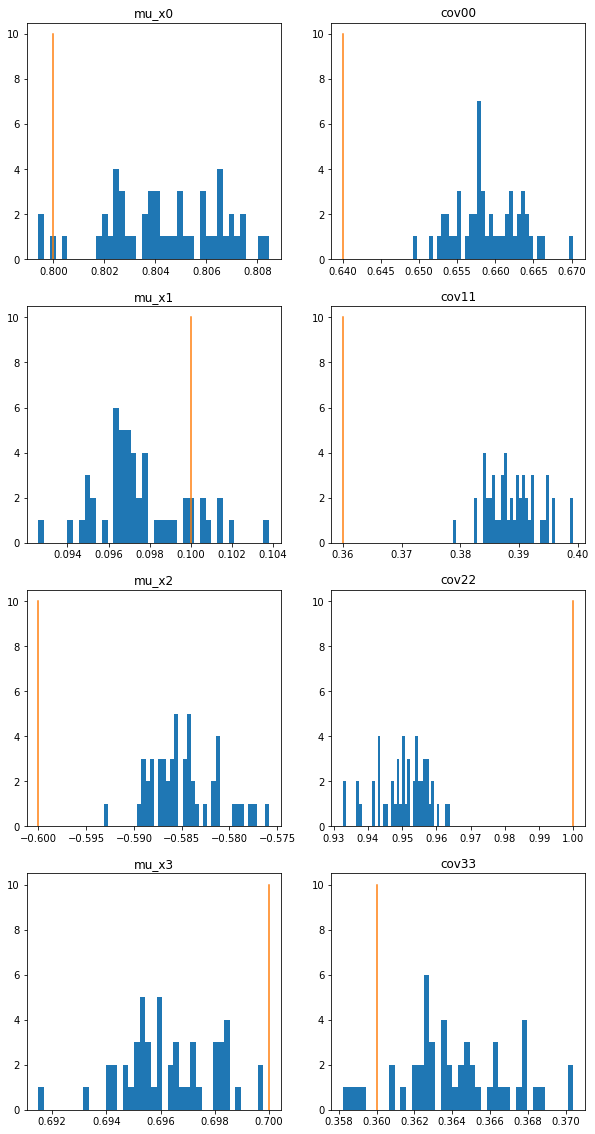

In [39]:
fig,ax = plt.subplots( ndim, 2, figsize=(10,5*ndim))

hbins=40

for i in range(ndim) :
    ax[i][0].hist( fit_results_mean_val[i,:], bins=hbins)
    ax[i][1].hist( fit_results_cov_val[i,i,:], bins=hbins)
    ax[i][0].plot( [true_mu[i], true_mu[i]], [0,10])
    ax[i][1].plot( [true_sig[i]*true_sig[i], true_sig[i]*true_sig[i]], [0,10])
    ax[i][0].set_title( 'mu_x%d' % i )
    ax[i][1].set_title( 'cov%d%d' % (i,i) )

plt.show